In [1]:
# 카네기멜론 대 캘리포니아 주택 가격 예측 모델 만들기

In [2]:
import pandas as pd

In [3]:
import sklearn

In [4]:
sklearn.__version__

'0.24.1'

### 데이터 가져오기

In [5]:
import os

In [6]:
print(os.getcwd())

C:\Users\Playdata


In [7]:
housing = pd.read_csv('housing.csv')

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# 20433 의 결측치가 하나있음

In [11]:
housing["ocean_proximity"][:5]

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
import matplotlib.pyplot as plt

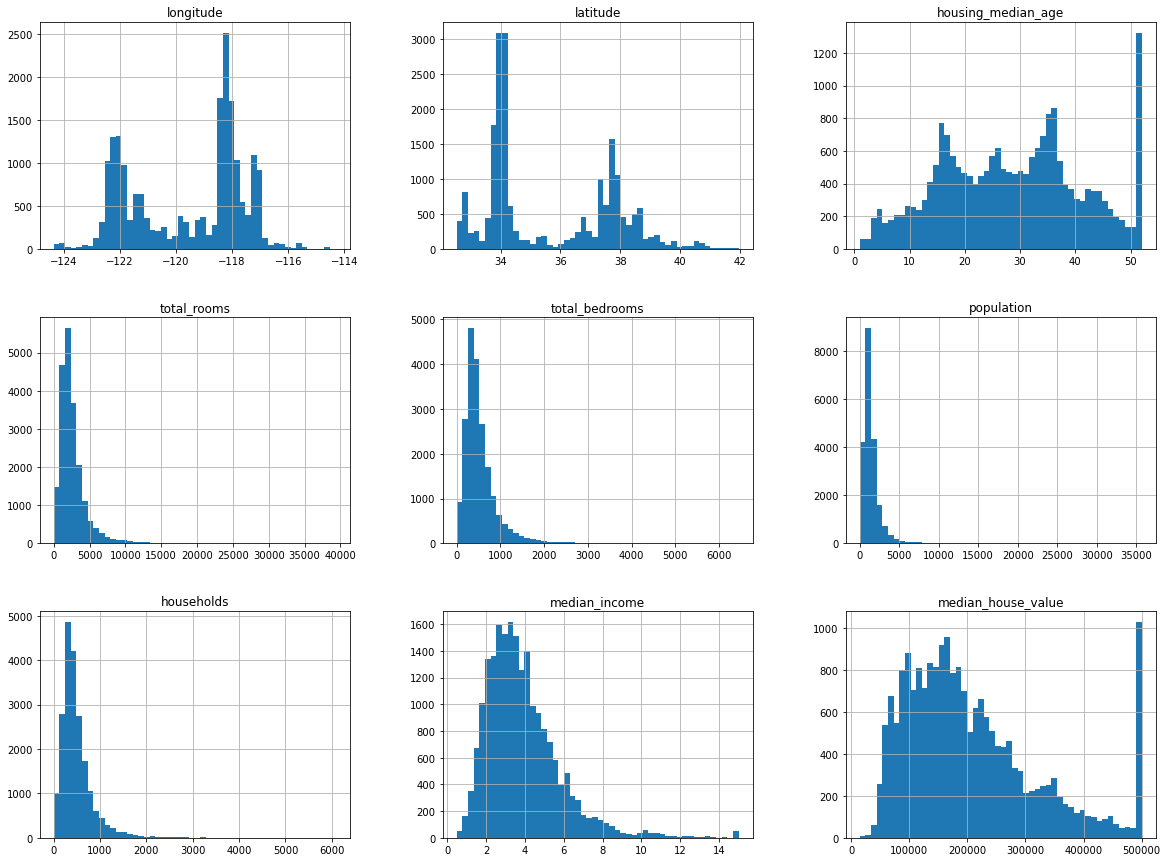

In [15]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

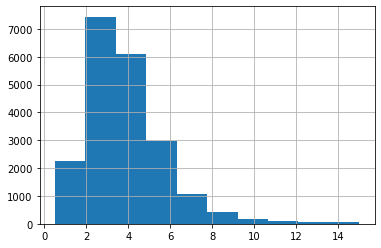

In [19]:
housing["median_income"].hist()

In [20]:
# 히스토그램은 빈도수 이므로, 총 2만건 중에 2~4만달러 사이가 7000건이 분포해 있음을 알 수 있다

In [21]:
# 인컴 자체는 연속적인 숫자인데 구간으로 나눠보자

import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf])

In [22]:
housing["income_cat"].value_counts()

(3.0, 4.5]    7236
(1.5, 3.0]    6581
(4.5, 6.0]    3639
(6.0, inf]    2362
(0.0, 1.5]     822
Name: income_cat, dtype: int64

In [23]:
# 제일 분포가 많은 순으로 보여줌

TypeError: '<' not supported between instances of 'pandas._libs.interval.Interval' and 'float'

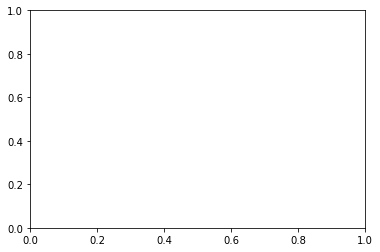

In [24]:
housing["income_cat"].hist()

In [25]:
# 왜 안나왔을까

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

In [28]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print(train_index)
    print(test_index)

[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]


In [29]:
# 인덱스들이 추출 됨 위 80프로 아래 20프로

In [30]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,"(1.5, 3.0]"
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,"(6.0, inf]"
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,"(1.5, 3.0]"
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,"(1.5, 3.0]"
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,"(3.0, 4.5]"
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,"(4.5, 6.0]"
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,"(1.5, 3.0]"
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,"(3.0, 4.5]"
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,"(3.0, 4.5]"


In [32]:
strat_train_set["income_cat"].value_counts()

(3.0, 4.5]    5789
(1.5, 3.0]    5265
(4.5, 6.0]    2911
(6.0, inf]    1889
(0.0, 1.5]     658
Name: income_cat, dtype: int64

In [33]:
# 요 바로 밑줄은 원본 데이터임

In [34]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

(3.0, 4.5]    1.402374
(1.5, 3.0]    1.275436
(4.5, 6.0]    0.705184
(6.0, inf]    0.457607
(0.0, 1.5]    0.159399
Name: income_cat, dtype: float64

In [35]:
strat_train_set["income_cat"].value_counts() / len(housing)

(3.0, 4.5]    0.280475
(1.5, 3.0]    0.255087
(4.5, 6.0]    0.141037
(6.0, inf]    0.091521
(0.0, 1.5]    0.031880
Name: income_cat, dtype: float64

In [36]:
# 이부분 붙어 값이 많이 달라졌으니 강사니꺼 꼭 다시 보고 해보자

In [37]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set["incom_cat"].value_counts() / len(test_set)

KeyError: 'incom_cat'

In [38]:
# 이건 또 값은 같은데 인덱스가 다르게 나오네 뭐가 잘못된거지??

In [39]:
# 여튼 위는 계층정보(미디언인컴)가 반영되어 샘플링된 테스트 데이터이고
# 아래는 랜덤으로 테스트된 데이터임

### 무작위 샘플링과 계층적 샘플링

In [40]:
# 무작위 샘플링은 작을 경우 샘플링 편향이 발생
# 그래서 계층적 정보를 입력해 테스트세트가 전체를 잘 대표할 수 있도록 해야 각 계층에서 올바른 수의 샘플을 추출함

* 계층별 샘플링(또다른 방법)

In [41]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [42]:
test_set["income_cat"].value_counts() / len(test_set)

(3.0, 4.5]    0.350533
(1.5, 3.0]    0.318798
(4.5, 6.0]    0.176357
(6.0, inf]    0.114583
(0.0, 1.5]    0.039729
Name: income_cat, dtype: float64

In [43]:
# 위와 값이 같음

In [44]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,"(6.0, inf]"
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,"(4.5, 6.0]"
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,"(3.0, 4.5]"
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,"(3.0, 4.5]"
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,"(3.0, 4.5]"


In [45]:
strat_test_set.drop("income_cat", axis=1, inplace = True)
strat_train_set.drop("income_cat", axis=1, inplace = True)

In [46]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [47]:
strat_test_set.drop("incom_cat", axis=1, inplace = True)
strat_train_set.drop("incom_cat", axis=1, inplace = True)

KeyError: "['incom_cat'] not found in axis"

### 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

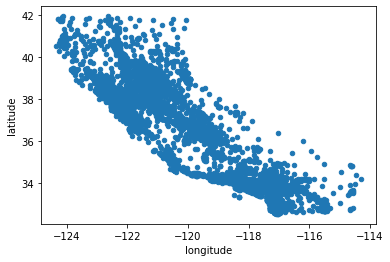

In [48]:
housing.plot(kind = 'scatter', x = 'longitude', y= 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

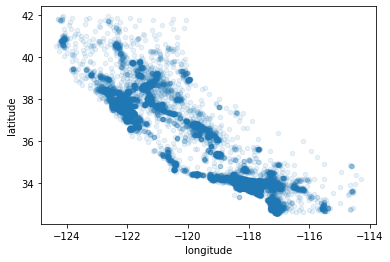

In [49]:
housing.plot(kind = 'scatter', x = 'longitude', y= 'latitude', alpha = 0.1)

In [50]:
# 이러면 좀 더 밀도를 보기 쉬움

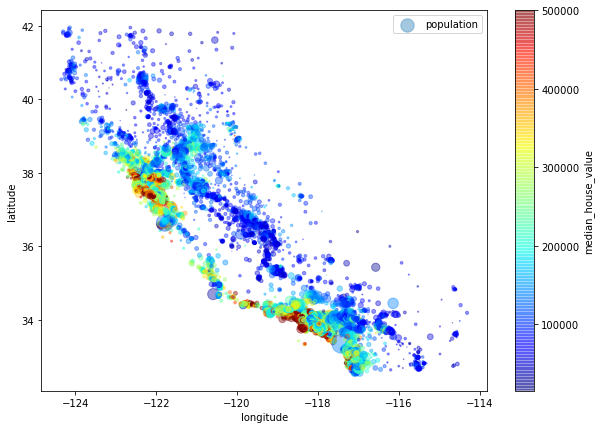

In [51]:
housing.plot(kind = 'scatter', x = 'longitude', y= 'latitude', alpha = 0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap = plt.get_cmap("jet"), colorbar=True,
            sharex=False)

plt.legend()

###### --> 해안가가 주택 가격이 높음, 밀집지역이 주택 가격이 높음

### 상관 관계 조사

In [52]:
corr_matrix = housing.corr()

In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

(0.0, 16.0, 0.0, 550000.0)

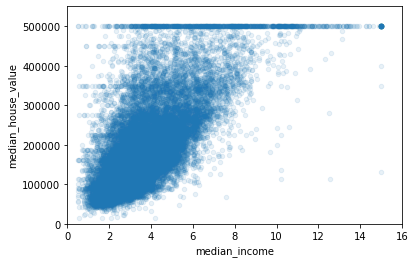

In [54]:
housing.plot(kind='scatter', x = 'median_income', y = "median_house_value",
            alpha = 0.1)
plt.axis([0,16,0,550000])

In [55]:
# 공분산을 각각의 표준편차로 나누면 상관계수가 나옴 corr

In [56]:
# 주택 가격과 어떤게 상관관계가 높은지 보는 과정임

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [57]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

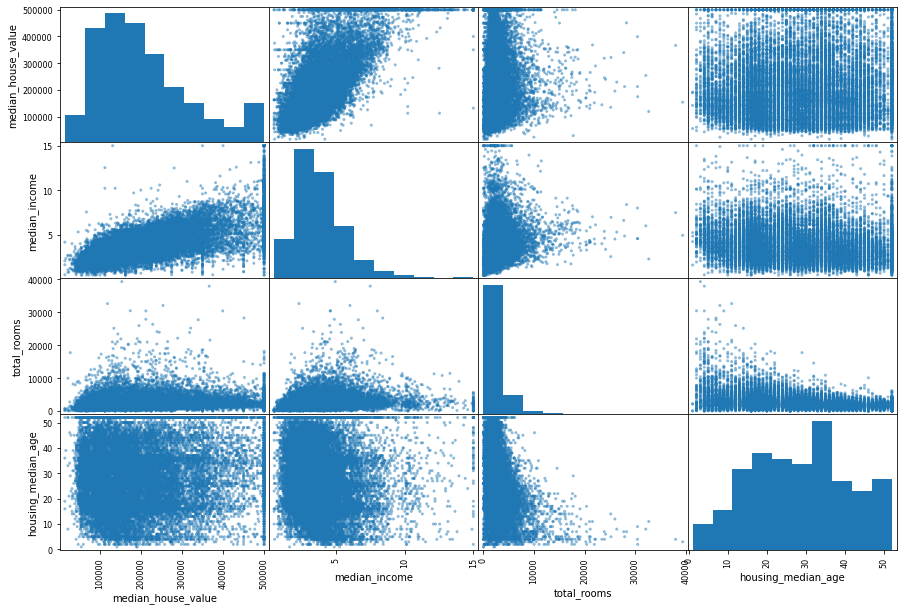

In [58]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,10))

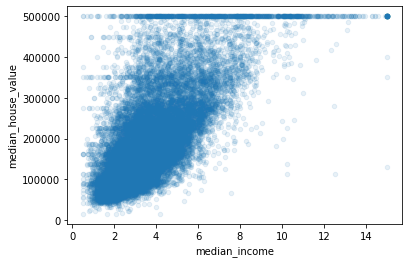

In [59]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.show([0, 16, 0, 550000])

In [60]:
# 산점도를 그려봤음

In [61]:
# 짝대기 그어진 부분은 5만으로 한정된 부분이 표현된거임

### 특성 조합으로 실험

In [62]:
# 우리가가지고 있는 df 에 새로운걸 추가해보자

housing["total_rooms"]

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [63]:
housing["total_bedrooms"]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [64]:
housing["population"]

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

In [65]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,"(6.0, inf]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,"(6.0, inf]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,"(6.0, inf]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,"(4.5, 6.0]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,"(3.0, 4.5]"


In [66]:
# 가구수가 있으니까 가구당 위의 값들이 얼마나 있는지 알아보자

In [67]:
housing["rphh"]= housing["total_rooms"] / housing["households"]

housing["tbrphh"] = housing["total_bedrooms"] / housing["households"]

housing["pphh"] = housing["population"] / housing["households"]

In [68]:
# 가구당 방 수가 가구의 경제규모나 비정상적인 요소를 판가름 할 수 있으니까 이렇게 알아보는것도 좋음
# 한 집에 방이 너무 많으면 좀 이상하니까(보통은)

In [69]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rphh,tbrphh,pphh
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,"(6.0, inf]",6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,"(6.0, inf]",6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,"(6.0, inf]",8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,"(4.5, 6.0]",5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,"(3.0, 4.5]",6.281853,1.081081,2.181467


In [70]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rphh                  0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
pphh                 -0.023737
population           -0.024650
longitude            -0.045967
tbrphh               -0.046739
latitude             -0.144160
Name: median_house_value, dtype: float64

In [71]:
# 방이 많으면 가격이 좀 더 낮을거라고 추측해 볼 수 있음

In [72]:
# 이런걸 피쳐 엔지니어링이라고하는데, 이런식으로 특성을 재가공해 볼 수있음
# 위에꺼 강사님이랑 수치가 좀 다르니까 다시 해보자

In [73]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
 11  rphh                20640 non-null  float64 
 12  tbrphh              20433 non-null  float64 
 13  pphh                20640 non-null  float64 
dtypes: category(1), float64(12), object(1)
memory usage: 2.1+ MB


In [74]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [75]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [76]:
# 이제는 이걸로 붓꽃데이터 처럼 특성과 레이블을 좀 나눠보자

In [77]:
strat_train_set.size

165120

In [78]:
strat_test_set.size

41280

In [79]:
# 80 대 20 으로 세트가 준비되어있음

In [80]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [81]:
# 얘로 작업할거임

### 데이터 전처리

In [82]:
housing = strat_train_set.drop("median_house_value", axis = 1) # 이러면 특성값만 하우징에 들어감
housing_label = strat_train_set["median_house_value"].copy()

In [83]:
housing.shape

(16512, 9)

In [84]:
housing_label.shape

(16512,)

In [85]:
# 정답과 특성으로 나눔

In [86]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [87]:
housing.isnull().any(axis=1) # 하나라도 널이 있으면 가져와라

17606    False
18632    False
14650    False
3230     False
3555     False
         ...  
6563     False
12053    False
13908    False
11159    False
15775    False
Length: 16512, dtype: bool

In [88]:
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


In [89]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

In [90]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [91]:
# sample_incomplete_rows 에 다섯개만 넣어놨음

In [92]:
# 옵션 1

In [93]:
# NaN이 들어간건 전부 다 삭제

In [94]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [95]:
# 일단 샘플에선 다 삭제됨

In [96]:
# 옵션 2

In [97]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [98]:
# 완전히 삭제

In [99]:
# 옵션 3

In [100]:
median = housing["total_bedrooms"].median()
median

433.0

In [101]:
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [102]:
from sklearn.impute import SimpleImputer

In [103]:
SimpleImputer(strategy = "median")

SimpleImputer(strategy='median')

In [104]:
# 임퓨테이션 트렌스포머가 이 함수의 정체임

In [105]:
imputer = SimpleImputer(strategy = "median")

In [106]:
imputer.fit / 골격을 맞추는 역할
imputer.transform / 데이터 변경

SyntaxError: invalid syntax (<ipython-input-106-1d080745bd1b>, line 1)

In [107]:
# 붓꽃데이터에서는 knn.fit 은 학습, knn.predict는 예측으로 분류기의 역할이었지만
# 여기선 전처리를 위한 변환기로 사용됨

In [108]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [109]:
# 해변과의 거리만 텍스트값이라 얘는 좀 떼어놔야함

In [110]:
housing_num = housing.drop('ocean_proximity', axis = 1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [111]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [112]:
# 변형은 전이지만 전략에 맞는 중간값을 설정했음

In [113]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [114]:
# 각각의 중간값을 보여줌

In [115]:
imputer.transform

<bound method SimpleImputer.transform of SimpleImputer(strategy='median')>

In [116]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [117]:
# 실제 변형후 비교해보면 실제로 값이 잘 구해진걸 확인할 수 있음

In [118]:
X = imputer.transform(housing_num)

In [119]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [120]:
# ndarray라 보긴 힘들지만 일단은 결측치는 해결이 됐음

In [121]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [122]:
pd.DataFrame(X, columns = housing_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [123]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [124]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

In [125]:
housing_tr.loc[sample_incomplete_rows.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [126]:
# sample_incomplete_rows 의 index 로 색인

In [127]:
imputer.strategy # 공개변수

'median'

In [128]:
# 내일은 데이터 인코딩을 하겠음 (pd.get_dummy)

# DAY 30 데이터 전처리

### 데이터 인코딩

In [129]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [130]:
housing["ocean_proximity"]

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

* OrdinalEncoder

In [131]:
from sklearn.preprocessing import OrdinalEncoder

In [132]:
oe = OrdinalEncoder()

In [133]:
housing_cat = housing[["ocean_proximity"]] # 데이터프레임을 만들고

In [134]:
housing_cat_encoded = oe.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [135]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* OneHotEncoder

In [136]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

housing_cat_ohe = ohe.fit_transform(housing_cat)
housing_cat_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [137]:
# 데이터는 안보여주고 메트릭스가 나왔네??/
# 1이 몇개 안되는 데이터를 sparse 메트릭스라고 함

In [138]:
housing_cat_ohe.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [139]:
# 사이킷 런을 통해 이렇게 인코딩 할 수 있음을 알아보았다

In [140]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [141]:
# 이제 숫자만 사용 가능한 머신러닝 과정을 위한 인코딩 과정 까지 모두 끝이 났어

In [142]:
# OrdinalEncoder / OneHotEncoder 가 뭐와 매칭되는지 아래에서 알아 보자

* 참고(판다스)

In [143]:
pd.factorize(housing["ocean_proximity"]) # 사이킷런의 OrdinalEncoder랑 같음

(array([0, 0, 1, ..., 2, 0, 3], dtype=int64),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [144]:
pd.get_dummies(housing["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0
11159,1,0,0,0,0


In [145]:
# 원-핫으로 바뀐걸 알 수 있다

* SimpleImputer /  MinMaxScaler / StandardScaler / OrdinalEncoder / OneHotEncoder
* 이게 다 preprocessing 안에 전처리용 모듈로 준비돼 있음

* fit, transform

### 나만의 변환기 만들기

In [146]:
from sklearn.base import BaseEstimator, TransformerMixin

In [147]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [148]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True) : # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # 아무것도 하지 않습니다.
    def transform(self, X) :
        roos_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room] # np.c_ 
        else:
            return np.c_[X, rooms_per_household, population_per_househeld]
        
atter_adder = CambinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

NameError: name 'CambinedAttributesAdder' is not defined

In [149]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [150]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

In [151]:
pd.DataFrame(housing_extra_attribs, columns = list(housing.columns) + ["rooms_per_household", "population_per_household"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
2,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,2.728571
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,4.077519
16509,-116.4,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,2.742484
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,3.808989


In [152]:
# 판다스를 전혀 사용하지 않고 사이킷런의 나만의 변환기를 통해 이렇게 만들어 냈음

### 파이프라인

In [153]:
# 위와 같은 스타일로 정리한 이유는 이 파이프라인을 구축하기 위함임

In [154]:
# 이걸로 언제든지 자동화에 사용가능

In [155]:
# 데이터만 주입하면 되도록 틀을 세팅하는 과정임

In [156]:
from sklearn.pipeline import Pipeline

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        #('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [159]:
housing_num_tr # 넘파이 임 심플임퓨터를 통해 Null이 다 바꼈을텐데 판다스로 바꿔서 알아보자

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [160]:
housing_num_tr.shape

(16512, 8)

In [161]:
col = housing.columns

In [162]:
col = col[:-1]

In [163]:
col

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [164]:
pd.DataFrame(housing_num_tr, columns = col)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [165]:
pd.DataFrame(housing_num_tr, columns = col).isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [166]:
# 심플임퓨터를 지나고 나서 널이 없어짐

In [167]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # 이제 이거까지 실행하면 뒤에 열 세개가 추가되어야 함
        #('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [168]:
housing_num_tr.shape

(16512, 11)

In [169]:
housing_num_tr[0]

array([-1.21890000e+02,  3.72900000e+01,  3.80000000e+01,  1.56800000e+03,
        3.51000000e+02,  7.10000000e+02,  3.39000000e+02,  2.70420000e+00,
        4.62536873e+00,  2.09439528e+00,  2.23852041e-01])

In [170]:
# 마지막 세개가 추가된 값임

In [171]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [172]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [173]:
housing_num_tr.mean()

-1.9225479402820057e-16

In [174]:
housing_num_tr.std()

0.9999999999999999

In [175]:
# 평균은 0에가깝고 표준편차는 1에 가깝게 바꿔버림

In [176]:
# 이제 데이터 자체만 보고 알아보기에는 어려워졌음. 대신 plot을 그릴 수있음

In [177]:
g = pd.DataFrame(housing_num_tr, columns = list(housing.columns[:-1]) +  ["rooms_per_household", "population_per_household", "bedrooms_per_household"])

<AxesSubplot:>

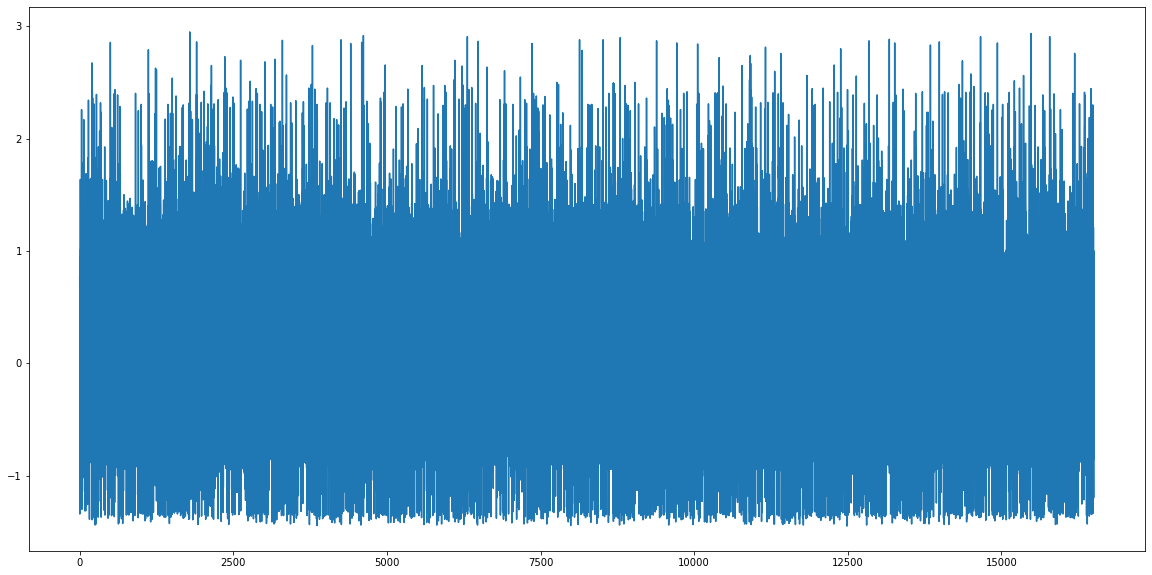

In [178]:
g.latitude.plot(figsize=(20, 10))

In [179]:
# 이제 각 컬럼에 대해 그림이 그려졌음

In [180]:
# 각 값들을 따로 가져오면 이렇게 쉽게 비교가능, 0값에 몰려있는거 확인 가능

In [181]:
# 지금까진 수치형 특성만 전처리 했어

In [182]:
# 이젠 ocean_proximity를 전처리 할거야

In [183]:
housing_cat = housing['ocean_proximity'].copy()

In [184]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [185]:
# 파이프라인에 돌릴게 없으니 원핫 인코더를 쓰자

In [186]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # 스파스 말고 실제 원본 데이터 넣어줌

housing_cat_ohe = ohe.fit_transform(housing_cat)
housing_cat_ohe

ValueError: Expected 2D array, got 1D array instead:
array=['<1H OCEAN' '<1H OCEAN' 'NEAR OCEAN' ... 'INLAND' '<1H OCEAN' 'NEAR BAY'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [187]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('cat', OneHotEncoder()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_cat)

ValueError: Expected 2D array, got 1D array instead:
array=['<1H OCEAN' '<1H OCEAN' 'NEAR OCEAN' ... 'INLAND' '<1H OCEAN' 'NEAR BAY'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [188]:
# 실패하긴 했지만 설명을 하자만,

# 위에서 변환기를 만들었자나! 근데 이걸로 파이프라인을 위에서 만들었거든?

# 그리고 파이프라인을 하나씩 뜯어서 실행해 봤어. 여기까진 성공!

In [189]:
# 이제 ocean_proximity 를 원핫으로 변환하는 과정을 진행하는 중이었어

In [190]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
housing_cat = housing[["ocean_proximity"]]

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('cat', OneHotEncoder()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_cat)

In [193]:
housing_num_tr

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [194]:
# 스파스는 기본값이 트루라 아무 설정으 안하면 원핫 인코더를 통과하면 스파스 매트릭스다 라는 정보만 있고 정보가 없음

# 1이 어느 지점에 위치히는지만 알게해주는 기능임(적으니까 메모리 적게 차지하면서 위치만 알려줌)

In [195]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [196]:
# 이제 수치형 데이터와 범주형 데이터를 합쳐보자!

In [197]:
from sklearn.compose import ColumnTransformer

In [198]:
# 이게 컬럼별로 트렌스포밍을 해줌

In [199]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

In [200]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [201]:
cat_attribs

['ocean_proximity']

In [202]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
    ])

NameError: name 'cat_pipeline' is not defined

In [203]:
housing_prepared = full_pipeline.fit_transform(housing)

NameError: name 'full_pipeline' is not defined

In [204]:
housing_prepared.shape

NameError: name 'housing_prepared' is not defined

In [205]:
# 오른쪽이 16개로 줄어야 되는데 안줄었네??ㅋㅋ cat_encoder를 대신써서 그런듯
# 위에서 cat_pipeline이 정의되지 않아서 그래

In [206]:
# 어쨌든 컬럼이 9개에서 16개로 모양이 바껴야 성공한거임

In [207]:
full_pipeline = ColumnTransformer([
    ("num", # num_pipeline,
     num_attribs),
    ("cat", # cat_pipeline,
     cat_attribs)
    ])

# 주석자리가 변환기 넣는 자리라 아래꺼는 OneHotEncoder 를 넣어도 돼
# 즉, 범주데이터는 파이프라인 없이 개별 변환기로 넣어도 된다는 말이야

# 변환기 자리에 'drop' 이라고 쓰고 shape 확인해보면 없어지는걸 볼 수 있는데, 아얘 삭제하고 이렇게 진행해도 돼

In [208]:
# 아무튼 데이터 준비작업 까지 80% 의 진행률이 되었음
# 이제 모델선텍, 검증, 튜닝까지 20% 가 남았음

# 모델 선택과 훈련(1)

선형 회귀 모델

In [209]:
from sklearn.linear_model import LinearRegression